# **菊安酱与菜菜的Python机器学习可视化**

## 第一期 关联图 (3)

### 扫码回复K进群，获取本课的ipy文件~！

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/%E4%BA%8C%E7%BB%B4%E7%A0%812.png" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接：https://www.jianshu.com/p/914b5f4ce6bf

In [72]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 06/50 边缘直方图

边缘直方图是在使用散点图探索横纵坐标关系的基础上，还使用直方图对横坐标和纵坐标分别进行分布探索的图像。  
这个图像在统计学的探索性分析（EDA）中常用，以探求数据是否符合统计学的一系列要求，比如说线性回归要求残差需满足正态分布，即因变量y满足正态分布等等。  
在机器学习中，我们也会探索数据是否处于偏态，以指导是否需要对数据做归一化或者标准化等处理。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/06%20%E7%9B%B4%E6%96%B9%E5%9B%BE.PNG" align="center" />

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑  
虽然没有显示图例不过散点有颜色：制造商的名称

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['simsun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] =  False #用来正常显示负号

要绘制出这张图，我们不仅是了解绘图的函数这么简单了。之前绘制的图像都是一画布一图，或者一个画布上多个图，但多个图都是同类型的图。  
现在要绘制的这张图上有三张图，并且这三张图的类型还不同：一张散点图，两张直方图。我们则我们首先需要来了解，如何构筑出可以容纳多个画布的图。

### 2. 准备画布与子图

#### **plt.figure，plt.GridSpec与fig.add_subplot**  

> **plt.figure**：构建画布  
>> figsize：画布大小  
>> dpi：该图像分辨率  

> **plt.GridSpec**：在画布上进行分割
>> nrows：画布上存在多少行  
>> ncols：画布上存在多少列  
>> hspace：格子之间上下的间隔  
>> wspace：格子之间左右的间隔

In [9]:
#创建画布与格子
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

<Figure size 1280x800 with 0 Axes>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/plt.GridSpec%E5%9C%A8%E5%B9%B2%E5%95%A5.PNG" align="center" />

> **fig.add_subplot**：在画布上建立子图
>> \*args：一个3位整数或三个独立的整数，用于描述子图的位置。如果三个整数按顺序为行，列和索引，则子图将采用行\*列网格上的索引所对应的位置。索引从左上角的0开始，向右增加，最右及最下用-1表示。与Python中所有的索引一样，取前不取后。  

In [10]:
#添加子图
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
#有了子图之后，就可以在每个子图上来进行绘图了

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 小练习：你能写出创建下面五个子图的代码吗？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%BB%83%E4%B9%A0%E9%A2%98.png" align="center" />

#### 正确答案
gs = plt.GridSpec(3, 3) <br>
ax1 = plt.subplot(gs[0, :],xticklabels=[], yticklabels=[])<br>
ax2 = plt.subplot(gs[1, :-1],xticklabels=[], yticklabels=[])<br>
ax3 = plt.subplot(gs[1:, -1],xticklabels=[], yticklabels=[])<br>
ax4 = plt.subplot(gs[-1, 0],xticklabels=[], yticklabels=[])<br>
ax5 = plt.subplot(gs[-1, -2],xticklabels=[], yticklabels=[])

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 3. 认识绘制直方图的函数

直方图是用来表示数据分布的图像，所谓的分布，就是“在一个连续型变量的不同取值范围内存在多少个值”的表示

#### 条形图 vs 直方图
> 1. 条形图中的“条”一般是分开的，而直方图中的“条”一般是没有距离的
> 2. 条形图的横坐标一般都是**分类型变量的不同类别**（比如不同的人，不同的城市等等），纵坐标一般都是**这一类别上的值之和或者计数**（工资，人口等等），而直方图的横坐标一般是某个**连续型变量上不同的取值区间**（比如体重，价格等等），纵坐标是这一段取值范围内**样本的个数之和**  
> 3. 所以条形图表示的是不同类别下的取值，核心是对比不同类别下的值的差异（所以条形图属于偏差图），而直方图表示的是不同取值区间内含有的样本个数，核心是查看某个变量的分布，以指导后续的预处理或者模型建立
> 4. 也因此，条形图是和两个变量相关，而直方图一般只和一个变量以及我们在变量上进行的分箱有关

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/bar%20charts%20vs%20his.PNG" align="center" />

#### **plt.hist()**

> 重要参数
>> x & bins：需要分析的变量以及把变量分成多少段  
>> orientation：直方图的方向，可分为横向(horizontal)和纵向(vertical)  
>> histtype：生成的直方图类型，可输入{'bar', 'barstacked', 'step',  'stepfilled'}四种类型，分别代表着：
>>>'bar'是传统的条形直方图。 如果给出多个数据，则条并排排列  
>>>'barstacked'是条形直方图，其中多个数据堆叠在一起  
>>>'step'生成一个默认未填充的线条轮廓  
>>>'stepfilled'生成一个默认填充的线条轮廓

In [11]:
#构建数据
X = np.random.randn(10000) #生成符合正态分布的随机数

(array([  1.,   1.,   0.,   0.,   0.,   1.,   4.,   2.,   5.,   6.,   9.,
         16.,  15.,  11.,  22.,  20.,  29.,  25.,  32.,  33.,  60.,  58.,
         55.,  87.,  93.,  99., 138., 131., 156., 148., 172., 184., 234.,
        207., 256., 255., 248., 331., 297., 311., 290., 347., 347., 322.,
        335., 345., 311., 362., 304., 298., 270., 272., 274., 212., 220.,
        216., 167., 179., 155., 163., 101., 116., 111.,  96.,  81.,  55.,
         49.,  45.,  36.,  31.,  29.,  24.,  21.,  15.,   7.,   9.,   8.,
          7.,   2.,   2.,   1.,   4.,   4.,   1.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.69339891, -3.60919793, -3.52499695, -3.44079597, -3.35659499,
        -3.27239401, -3.18819302, -3.10399204, -3.01979106, -2.93559008,
        -2.8513891 , -2.76718812, -2.68298714, -2.59878616, -2.51458518,
        -2.43038419, -2.34618321, -2.26198223, -2.17778125, -2.09358027,
        -2.00937929, -1.92

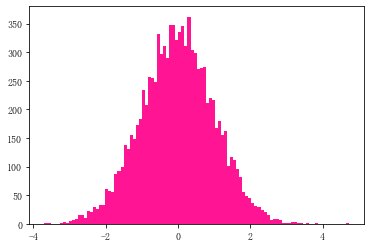

In [15]:
plt.hist(x=X #需要分析的变量
                           , bins=100 #需要把变量分成多少段，即形成多少个柱子的分布
                           , histtype='stepfilled' 
                           , orientation='vertical' 
                           , color='deeppink'
                          )

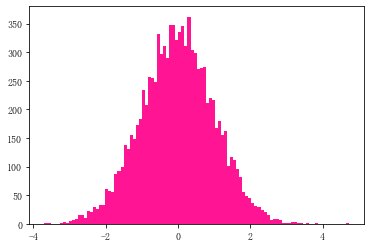

In [14]:
n, bins, patches = plt.hist(x=X #需要分析的变量
                           , bins=100 #需要把变量分成多少段，即形成多少个柱子的分布
                           , histtype='stepfilled' 
                           , orientation='vertical' 
                           , color='deeppink'
                          )
#自动返回三项内容：每个箱子中含有多少个样本，在变量中划分出的箱子的宽度，用于创建直方图的补丁

In [16]:
n

array([  1.,   1.,   0.,   0.,   0.,   1.,   4.,   2.,   5.,   6.,   9.,
        16.,  15.,  11.,  22.,  20.,  29.,  25.,  32.,  33.,  60.,  58.,
        55.,  87.,  93.,  99., 138., 131., 156., 148., 172., 184., 234.,
       207., 256., 255., 248., 331., 297., 311., 290., 347., 347., 322.,
       335., 345., 311., 362., 304., 298., 270., 272., 274., 212., 220.,
       216., 167., 179., 155., 163., 101., 116., 111.,  96.,  81.,  55.,
        49.,  45.,  36.,  31.,  29.,  24.,  21.,  15.,   7.,   9.,   8.,
         7.,   2.,   2.,   1.,   4.,   4.,   1.,   1.,   0.,   1.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.])

In [17]:
n.shape

(100,)

In [18]:
bins

array([-3.69339891, -3.60919793, -3.52499695, -3.44079597, -3.35659499,
       -3.27239401, -3.18819302, -3.10399204, -3.01979106, -2.93559008,
       -2.8513891 , -2.76718812, -2.68298714, -2.59878616, -2.51458518,
       -2.43038419, -2.34618321, -2.26198223, -2.17778125, -2.09358027,
       -2.00937929, -1.92517831, -1.84097733, -1.75677635, -1.67257536,
       -1.58837438, -1.5041734 , -1.41997242, -1.33577144, -1.25157046,
       -1.16736948, -1.0831685 , -0.99896752, -0.91476653, -0.83056555,
       -0.74636457, -0.66216359, -0.57796261, -0.49376163, -0.40956065,
       -0.32535967, -0.24115869, -0.1569577 , -0.07275672,  0.01144426,
        0.09564524,  0.17984622,  0.2640472 ,  0.34824818,  0.43244916,
        0.51665014,  0.60085113,  0.68505211,  0.76925309,  0.85345407,
        0.93765505,  1.02185603,  1.10605701,  1.19025799,  1.27445897,
        1.35865996,  1.44286094,  1.52706192,  1.6112629 ,  1.69546388,
        1.77966486,  1.86386584,  1.94806682,  2.0322678 ,  2.11

In [19]:
bins.shape

(101,)

In [20]:
patches

In [21]:
[*patches]

### 4. 认识数据

In [22]:
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")

In [23]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [25]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [26]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 5. 绘制图像，代码详解

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/plt.GridSpec%E5%9C%A8%E5%B9%B2%E5%95%A5.PNG" align="center" />

<ipython-input-49-1da402c88f36>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels) #再将带一位小数的浮点数变成标尺


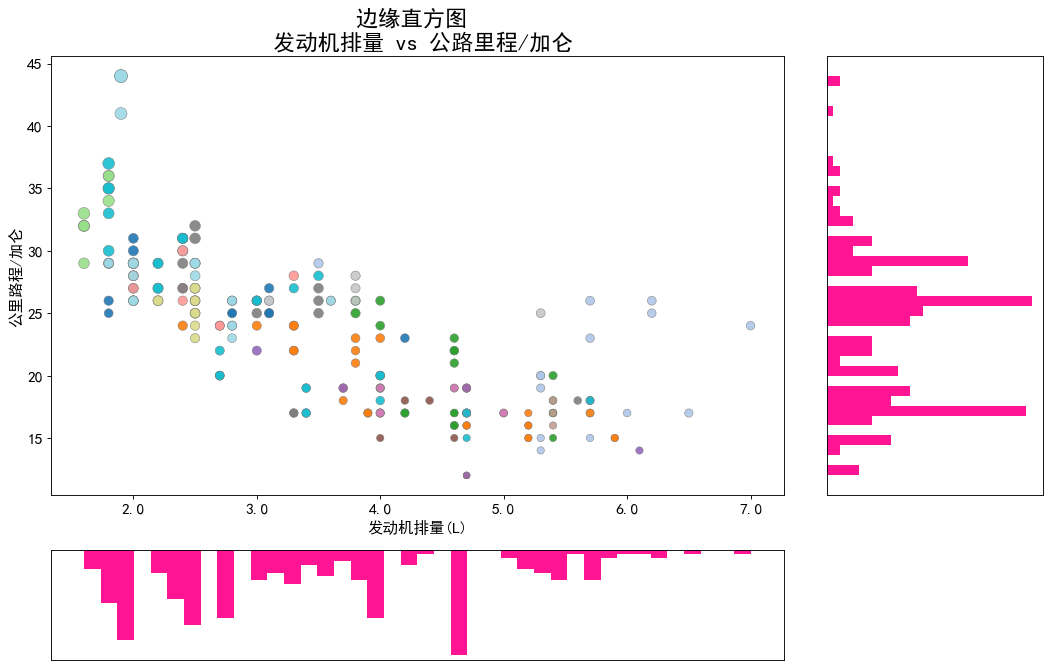

In [49]:
#分割画布
fig = plt.figure(figsize=(16, 10), dpi=80,facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy'
                , s=df.cty*4 #设置尺寸以影响气泡图，这里是城市里程/加仑
                , data=df
                , c=df.manufacturer.astype('category').cat.codes #这是按类别编码的一种写法
                , cmap="tab20" #colormap可以根据自己喜欢的随意修改
                , edgecolors='gray', linewidths=.5, alpha=.9)

#绘制底部的直方图
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis() #让y轴反向，为了美观所以让分布形成朝下的分布

#绘制右边的直方图
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']
ax_main.set(title='边缘直方图 \n 发动机排量 vs 公路里程/加仑'
            , xlabel='发动机排量(L)'
            , ylabel='公里路程/加仑')#设置标题，横坐标轴和纵坐标轴的名称
ax_main.title.set_fontsize(20) #对标题设置字体大小

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) #对所有横坐标纵坐标上的标题和标尺都设置字体

for item in [ax_bottom,ax_right]:
    item.set_xticks([])
    item.set_yticks([]) #去掉两个直方图上的标尺
    
xlabels = ax_main.get_xticks().tolist() #将现有的标尺取出来，转化为带一位小数的浮点数
ax_main.set_xticklabels(xlabels) #再将带一位小数的浮点数变成标尺
plt.show()

In [33]:
ax_main.title #标题的位置 + 标题的内容

Text(0.5, 1.0, '边缘直方图 \n 发动机排量 vs 公路里程/加仑')

In [27]:
df.manufacturer

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [28]:
df.manufacturer.astype('category')

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: category
Categories (15, object): ['audi', 'chevrolet', 'dodge', 'ford', ..., 'pontiac', 'subaru', 'toyota', 'volkswagen']

In [30]:
df.manufacturer.astype('category').cat

In [31]:
df.manufacturer.astype('category').cat.codes #常用的编码方式

0       0
1       0
2       0
3       0
4       0
       ..
229    14
230    14
231    14
232    14
233    14
Length: 234, dtype: int8

In [39]:
([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels())

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(22.921875000000007, 0.5, '公里路程/加仑'),
 Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [34]:
ax_main.xaxis.label #提取出我们的X轴的标签

Text(0.5, 152.39393939393932, '发动机排量(L)')

In [35]:
ax_main.yaxis.label

Text(22.921875000000007, 0.5, '公里路程/加仑')

In [36]:
[ax_main.xaxis.label, ax_main.yaxis.label]

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(22.921875000000007, 0.5, '公里路程/加仑')]

In [37]:
ax_main.get_xticklabels()

[Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0')]

In [38]:
ax_main.get_xticklabels() + ax_main.get_yticklabels() #前两个数字表示位置，最后表示我们设定的标签

[Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [44]:
ax_main.get_xticks().tolist()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

### 6. 解读图像

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 07/50 边缘箱线图

边缘箱线图是在散点图的边缘分别画上对横纵坐标的箱线图，以对原始的散点图进行补充的图像。  

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/07%20%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑  
虽然没有显示图例不过散点有颜色：制造商

### 1. 导入需要的绘图库

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 认识箱线图及绘制箱线图的函数

箱线图，又叫做箱型图，箱图，是一种用于显示一个变量分布情况的统计图。其核心作用和直方图类似，我们在统计学和机器学习中也使用它来观察数据是否处于偏态，只不过直方图更著重于看到数据在整个取值区间上的分布，而箱线图更着重于观察变量上的重要分割点。箱线图能够精确地显示有关数据分布的关键数据节点，因此也常被用来作为查找异常值的方式。  
  
认识箱线图的第一步是学会阅读箱线图：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

其中上四分位数就是直方图中占75%数据量的位置，下四分位数就是直方图中占25%数据量的位置。但这些在分布上代表了什么含义呢？

### **箱线图 vs 直方图**

直方图和箱线图都表达数据的分布，从下面的图可以看出来，两者是一一对应的。  
当直方图的分布越接近正太分布，箱线图也会越对称  
直方图的柱子较高较多的地方，就会是箱线图的箱子所在的地方  
箱线图所显示的中位数一般都会非常接近直方图中最高的柱子（毕竟这个取值范围内的样本点最多）

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%9B%B4%E6%96%B9%E5%9B%BEvs%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

#### **sns.boxplot()**

> **重要参数**
>> x ：需要绘制箱线图的变量  
>> ax ：需要绘制箱线图的子图  
>> orient ：箱线图的方向，可选填"v"或者"h"来决定箱线图的方向  
>> meanline ：是否显示均值线  

In [55]:
#正态分布下的随机数
# X = np.random.randn(1000)
#严重偏态分布下的随机数
X = np.random.randint(0,300,50).tolist() + np.random.randint(300,800,50).tolist() + np.random.randint(800,1000,900).tolist() 

In [56]:
X

[264,
 108,
 185,
 92,
 129,
 69,
 2,
 34,
 245,
 272,
 138,
 91,
 108,
 148,
 107,
 36,
 213,
 66,
 67,
 244,
 194,
 204,
 269,
 188,
 184,
 5,
 190,
 17,
 298,
 208,
 164,
 141,
 224,
 90,
 91,
 295,
 183,
 8,
 196,
 205,
 60,
 239,
 170,
 74,
 269,
 109,
 110,
 275,
 49,
 241,
 499,
 621,
 788,
 501,
 515,
 664,
 546,
 361,
 393,
 371,
 711,
 311,
 420,
 790,
 460,
 785,
 444,
 461,
 576,
 790,
 709,
 621,
 427,
 440,
 687,
 501,
 670,
 432,
 356,
 635,
 460,
 338,
 463,
 461,
 353,
 376,
 337,
 511,
 418,
 721,
 696,
 488,
 513,
 733,
 349,
 428,
 372,
 789,
 386,
 741,
 974,
 962,
 949,
 862,
 852,
 989,
 985,
 857,
 869,
 808,
 995,
 932,
 909,
 969,
 910,
 834,
 837,
 947,
 872,
 861,
 818,
 876,
 989,
 893,
 905,
 829,
 895,
 974,
 983,
 830,
 849,
 809,
 975,
 938,
 851,
 850,
 856,
 965,
 918,
 855,
 956,
 831,
 957,
 826,
 864,
 964,
 991,
 815,
 863,
 938,
 986,
 901,
 980,
 893,
 870,
 847,
 955,
 949,
 959,
 930,
 962,
 858,
 968,
 886,
 853,
 989,
 985,
 818,
 809,
 859,

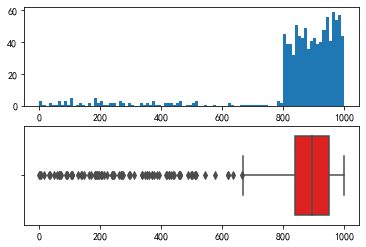

In [57]:
fig, (ax1,ax2) = plt.subplots(2)

#直方图
ax1.hist(X,bins=100)

#箱线图
sns.boxplot(x=X #研究的变量
            ,ax=ax2 #绘制的子图
            , orient="h"
            , color="red"
           ,meanline=True);

来计算下极值？首先找出四分位距。NumPy中的percentile功能可以帮助我们找出位于分布a%处的分位数  

In [58]:
Q3, Q1 = np.percentile(X, [75 ,25])

In [59]:
iqr = Q3-Q1

In [60]:
iqr

113.25

In [61]:
min(X)

2

In [62]:
Q1 - 1.5*iqr

667.875

In [63]:
max(X)

999

In [64]:
Q3 + 1.5*iqr

1120.875

### 3. 导入数据，绘制图像

In [65]:
#导入数据
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")

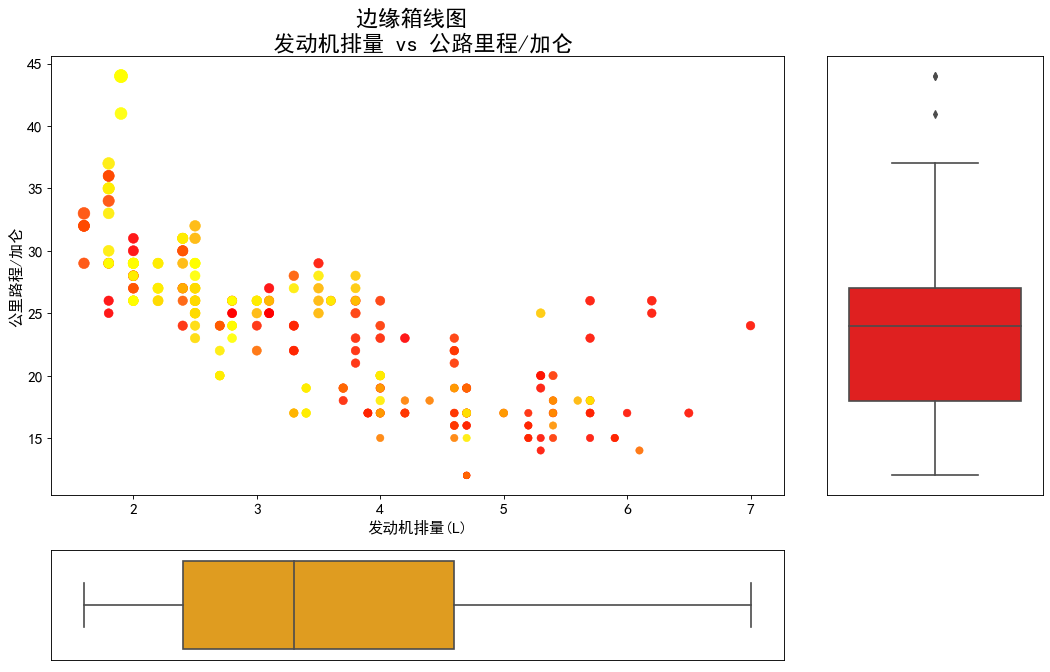

In [86]:
#分割画布
fig = plt.figure(figsize=(16, 10), dpi= 80,facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy', s=df.cty*4
                , c=df.manufacturer.astype('category').cat.codes
                , alpha=.9, data=df, cmap="autumn", linewidths=.5)

#对右侧和下方绘制箱线图
sns.boxplot(y=df.hwy, data=df, ax=ax_right, orient="v", color="red")
sns.boxplot(x=df.displ, data=df, ax=ax_bottom, orient="h",color='orange')

#装饰图像
#移除箱线图自带的坐标轴名称
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

#设置标题，横坐标轴和纵坐标轴的名称
plt.rcParams['font.sans-serif']=['Simhei']
ax_main.set(title='边缘箱线图 \n 发动机排量 vs 公路里程/加仑', xlabel='发动机排量(L)', ylabel='公里路程/加仑')

#去掉两个直方图上的标尺
for item in [ax_bottom,ax_right]:
    item.set_xticks([])
    item.set_yticks([])

#对标题设置字体大小
ax_main.title.set_fontsize(20) 

#对所有横坐标纵坐标上的标题和标尺都设置字体大小
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) 

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

还剩下两个相关图像，会由菊安酱给大家讲解哦~

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />